Following along the book on Complex Network Analysis (CNA), using the Python libraries NetworkX, iGraph, graph-tool, 
Zinoviev, Dmitry: Complex Network Analysis in Python. Recognize, Construct, Visualize, Analyse, Interpret. Version P1.0 (2018)

Since the release of the book, NetworkX has been migrated from v1.0 to v2.0 / v2.1 (July 2018) and some of the functions do not exist any longer - here's a migration guide https://networkx.github.io/documentation/stable/release/migration_guide_from_1.x_to_2.0.html

There's the full documentation of NetworkX v2.1 in pdf (666 pages) here https://networkx.github.io/documentation/stable/_downloads/networkx_reference.pdf

In [35]:
import networkx as nx

In [36]:
G = nx.Graph([("A", "eggs"),])
G.add_node("spinach") # add a single node
G.add_node("Hg") # add a single node by mistake
G.add_nodes_from(["folates", "asparagus", "liver"]) # add a list of nodes
G.add_edge("spinach", "folates") # add one edge, both ends exist
G.add_edge("spinach", "heating oil") # add one edge by mistake
G.add_edge("liver", "Se") # add one edge, one end does not exist
G.add_edges_from([("folates", "liver"), ("folates", "asparagus")]) # add list of edges

In [37]:
G.remove_node("Hg") # removes this node
G.remove_nodes_from(["Hg",]) # removes a missing node from a list
G.remove_edge("spinach", "heating oil") # removes edge between these nodes
G.remove_edges_from([("spinach", "heating oil"),]) # removes edges from a list
G.remove_node("heating oil") # not removed yet (?????)

In [38]:
# use G.clear to delete all graph nodes and edges at once but keep the graph shell

In [39]:
print(G.node)
# this returns a node list in v2.1 instead of an attribute dictionary (that is empty)
# prior to v2.1 returning a node list was done with print(G.nodes) and print(G.edges) respectively
dict(G.nodes)

['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se']


{'A': {},
 'eggs': {},
 'spinach': {},
 'folates': {},
 'asparagus': {},
 'liver': {},
 'Se': {}}

In [40]:
# by the way: G = nx.Graph() creates an empty undirected graph (i.e. we name it / assign the variable "G")
# G = nx.DiGraph() creates an empty directed graph - many NetworkX algorithms refuse to work with directed graphs,
# but they can be convertet into undirected graphs F = nx.Graph(G) - but those two are not the same thing!
# multigraphs are like undirected graphs but they can have multiple, parallel edges between the same nodes G = nx.MultiGraph()
# there's also directed multigraphs G = nx.MultiDiGraph()

In [41]:
print(G.adj)
# since NetworkX v2.1 way of displaying attributes of edges ('dictionary'),
# before it was print(G.edge) which now triggers an error
dict(G.edges)

{'A': {'eggs': {}}, 'eggs': {'A': {}}, 'spinach': {'folates': {}}, 'folates': {'spinach': {}, 'liver': {}, 'asparagus': {}}, 'asparagus': {'folates': {}}, 'liver': {'Se': {}, 'folates': {}}, 'Se': {'liver': {}}}


{('A', 'eggs'): {},
 ('spinach', 'folates'): {},
 ('folates', 'liver'): {},
 ('folates', 'asparagus'): {},
 ('liver', 'Se'): {}}

In [42]:
print(G.nodes())
# node list

['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se']


In [43]:
print(G.edges())
# edge list

[('A', 'eggs'), ('spinach', 'folates'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se')]


In [44]:
print(G.nodes(data=True))

[('A', {}), ('eggs', {}), ('spinach', {}), ('folates', {}), ('asparagus', {}), ('liver', {}), ('Se', {})]


In [45]:
len(G)

7

In [46]:
print(G.edges(data=True))

[('A', 'eggs', {}), ('spinach', 'folates', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {})]


In [47]:
import csv
# imports the library csv for reading and writing .csv files in Python
import matplotlib.pyplot as plt
# visualisation library for the graphs
# import dzcnapy_plotlib as dzcnapy
# some personal library especially for this here book (cannot be found, install somehow?)

In [48]:
with open("data/nutrients.csv") as infile: # has to be adjusted depending on where the file is stored
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


In [49]:
# there's a part of the chapter where there's a selfloop 'hidden' in the nodes list above
# that is supposed to be detected with G.selfloop_edges() and removed with G.remove_edges_from
# the code should look like this:
# loops = G.selfloop_edges()
# G.remove_edges_from(loops)
# print(loops)
# and should return [('tomatoes', 'tomatoes')]
# then checked with running the code again
# loops = G.selfloop_edges()
# print(loops)
# []
# however, I cannot make it work, since the function has been removed with NetworkX v2.1 and substituted with
# nx.selfloop_edges(G) - moving it into a different class
# but I cannot make it work with that function either, instead there's an error message
# <generator object selfloop_edges.<locals>.<genexpr> at 0x0000021970AD64C0>
# haven't found out what to do about it and how to fix it!

### Re-labeling nodes (uppercase instead of lowercase) using nx.relabel_nodes()

In [50]:
mapping = {node: node.title() for node
          in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())
# it works! marvelous!! I have no idea what exactly he does here, though

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


In [51]:
print(G["Zn"])
# prints all nodes that share a connection with "Zn"

{'Liver': {}, 'Beans': {}, 'Kidneys': {}, 'Potatoes': {}, 'Nuts': {}, 'Beef': {}, 'Poultry': {}}


### Adding attributes to nodes and edges
The book says "an attribute is implemented as a dictionary associated with the node or edge. The dictionary keys are attribute names. As such, they must be immutable: int, float, bool, str, and so on. There are no limitations on the values."

In [52]:
# attributes can be defined while adding nodes or edges
G.add_node("Honey", edible=True)
G.add_nodes_from([("Steel", {"edible"  : False}), ]) # attention to the syntax here!!
G.add_edge("Honey", "Steel", weight=0.0)
G.add_edges_from([("Honey", "Zn"),], related=False)

In [53]:
# the edge attribute "weight" is used in NetworkX and other CNA libraries consistently to denote edge strength.
# graphs using this attribute are called weighted graphs
# there's a method for adding weighted graphs:
G.add_weighted_edges_from([("Honey", "Zn", 0.01), ("Honey", "Sugar", 0.99)])
# when adding several edges with this function, only one set of attributes can be set for all of them

In [54]:
G.nodes["Zn"]["nutrient"] = True # Zink is a nutrient

In [55]:
G.edges["Zn", "Beef"]["weight"] = 0.95 # Zink and Beef are well connected (high weight)
# attention! the functions G.node and G.edge have been migrated to G.nodes[n] and G.edges[u, v] in NetworkX v2.1

In [56]:
# removing unwanted attributes for nodes:
del G.nodes["Zn"]["nutrient"]

In [57]:
# removing unwanted attributes for edges:
del G.edges["Zn", "Beef"]["weight"]

Create a boolean attribute ("True" / "False") for all nutrients, called "nutrient"

In [58]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates", "Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, nutrient_dict, "nutrient")
# attention: in NetworkX v2.1 the order of the argument in () has changed from (graph, name, value) to (graph, value, name=None)
# name=None allows for name to be ommitted completely

In [59]:
print(G.nodes(data=True))
# prints the boolean attribute for all nodes,
# not only the ones where the attribute "nutrients" is True (which I think is counter-intuitive)

[('A', {'nutrient': True}), ('B12', {'nutrient': True}), ('B6', {'nutrient': True}), ('C', {'nutrient': True}), ('Ca', {'nutrient': True}), ('Cu', {'nutrient': True}), ('D', {'nutrient': True}), ('E', {'nutrient': True}), ('Mn', {'nutrient': True}), ('Se', {'nutrient': True}), ('Zn', {'nutrient': True}), ('Carrots', {'nutrient': False}), ('Eggs', {'nutrient': False}), ('Fatty Fish', {'nutrient': False}), ('Green Leafy Vegs', {'nutrient': False}), ('Liver', {'nutrient': False}), ('Milk', {'nutrient': False}), ('Tomatoes', {'nutrient': False}), ('Asparagus', {'nutrient': False}), ('Beans', {'nutrient': False}), ('Kidneys', {'nutrient': False}), ('Potatoes', {'nutrient': False}), ('Pumpkins', {'nutrient': False}), ('Broccoli', {'nutrient': False}), ('Cheese', {'nutrient': False}), ('Nuts', {'nutrient': False}), ('Whole Grains', {'nutrient': False}), ('Mushrooms', {'nutrient': False}), ('Seeds', {'nutrient': False}), ('Legumes', {'nutrient': False}), ('Wheat', {'nutrient': False}), ('Beef'

## Visualizing a Network with Matplotlib
Why? NetworkX doesn't do visualization, but the matplotlib.pyplot library can be used for this

In [60]:
import matplotlib.pyplot as plt

There's a couple of different layouts for network graph visualisations:

Random layout --- randomly; requires NumPy library --- pos=nx.random_layout --- nx.draw_randon

Circular layout --- on a circle --- pos=nx.circular_layout --- nx.draw_circular

Shell layout --- on concentric circles defined by nlist --- pos=nx.shell_layout(G, nlist=None) --- nx.draw_shell

Spectral layout --- based on eigenvector centrality values --- pos=nx.spectral_layout --- nx.draw_spectral

Force-directed layout --- "balls connected with springs" --- pos=nx.frucherman_reingold_layout --- nx.draw_networkx

Force-directed layout (alternative) --- pos=nx.spring_layout --- nx.draw_spring


The books says, "at the rendering phase, NetworkX draws the nodes, labels, and edges at the prescribed positions, using the default or specified shapes, fonts, and colors. You can see the graphical output on the screen, save it into a file (PNG, PDF, PostScript, EPS, SVG), or both. First save the image, then display it."

In [61]:
import dzcnapy_plotlib as dzcnapy #--- ok, what happens here is that I can import a custom library as long as it lives
# in the same directory as the notebook is running in
# preparation for drawing
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

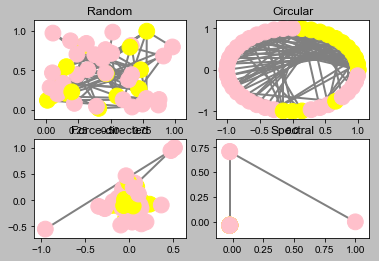

In [62]:
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False,
                    **dzcnapy.medium_attrs)
    plot.set_title(title)

In [63]:
# when not using the dzcnapy plot library, the viz looks horrible;
# I don't know how to sensibly reshape the visualisations here and do not fully understand what happens in the cell above

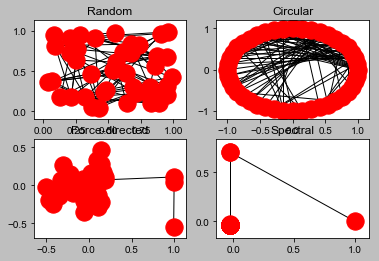

In [64]:
# now the same as above without the dzcnapy plot library
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False)
    plot.set_title(title)

In [65]:
# does not look pretty - better use something else for visualisation, like Gephi

In [66]:
from networkx.drawing.nx_agraph import graphviz_layout

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

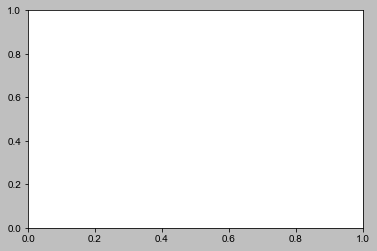

In [67]:
_, plot = plt.subplots()
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients-graphviz")